In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from model import SparseAutoencoder
import input_data

In [2]:
sess = tf.InteractiveSession()

In [3]:
mnist = input_data.read_data_sets("../MNIST_data/")

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
inputs = tf.placeholder(tf.float32, [None, 28 * 28])
encoder = SparseAutoencoder(inputs, n_input=28 * 28, n_hidden=100)

In [5]:
saver = tf.train.Saver()
saver.restore(sess, "sparse_autoencoder.ckpt")

In [6]:
X_test = mnist.test.images[:32]
outputs = sess.run(encoder.outputs, feed_dict={inputs: X_test})

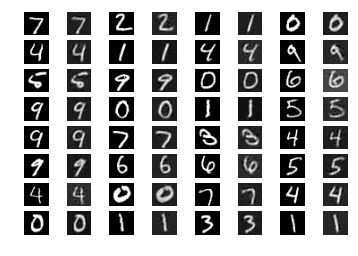

In [7]:
plt.figure()
for i in xrange(len(outputs)):
    plt.subplot(8, 8, 2 * i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(8, 8, 2 * i + 2)
    plt.imshow(outputs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

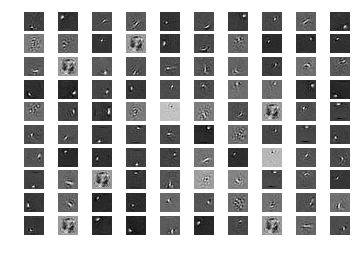

In [8]:
weights = encoder.fc1w.eval()
for i in xrange(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(weights[:, i].reshape(28, 28), cmap='gray')
    plt.axis('off')